# Data

**Extreme Values**: **Temperature**.

**Covariates**:
- Geopotential (Mean Sea Level Pressure) - responsible for teleconnections
- Sea Surface Temperature - responsible for long-term trends
- Soil Moisture
- Shortwave Radiation, i.e., Surface Solar Radiation Downwards From Sun - responsible for clouds.
- Wind, e.g., u,v or magnitude and direction

In [7]:
import autoroot
from dotenv import load_dotenv
load_dotenv()  # take environment variables from .env.
import pandas as pd
import numpy as np
from matplotlib.ticker import ScalarFormatter
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr
import seaborn as sns
import regionmask
sns.reset_defaults()
sns.set_context(context="talk", font_scale=0.7)

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data

**Extreme Values**: **Temperature**.

**Covariates**:
- Geopotential (Mean Sea Level Pressure) - responsible for teleconnections
- Sea Surface Temperature - responsible for long-term trends
- Soil Moisture
- Shortwave Radiation, i.e., Surface Solar Radiation Downwards From Sun - responsible for clouds.
- Wind, e.g., u,v or magnitude and direction

## Mask

In [8]:
lon = np.arange(-179.5, 180)
lat = np.arange(-89.5, 90)

### Spain Mask

In [10]:
# get countries mask
countries = regionmask.defined_regions.natural_earth_v5_0_0.countries_110
# # create mask variable
mask = countries.mask_3D(lon, lat)
# # select Spain mask
# spain_mask = mask.isel(region=(mask.names=="Spain")).squeeze()

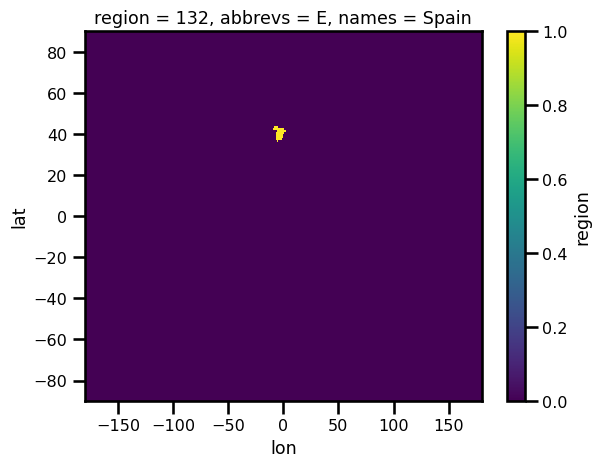

In [12]:
mask.isel(region=(mask.names=="Spain")).plot()

### Land-Sea

In [13]:
# get land-sea-mask mask
land_110 = regionmask.defined_regions.natural_earth_v5_0_0.land_110
# create land mask variable
land_mask = land_110.mask_3D(ds)

NameError: name 'ds' is not defined

In [5]:
countries

<regionmask.Regions 'Natural Earth Countries: 110m'>
Source:   http://www.naturalearthdata.com
overlap:  False

Regions:
  0 FJ                     Fiji
  1 TZ                 Tanzania
  2 WS                W. Sahara
  3 CA                   Canada
  4 US United States of America
 .. ..                      ...
172 RS                   Serbia
173 ME               Montenegro
174 KO                   Kosovo
175 TT      Trinidad and Tobago
176 SS                 S. Sudan

[177 regions]

### Temperature

In [14]:
data_url = "/pool/datos/reanalisis/era5/daily/spain/025/t2max/*.nc"
ds = xr.open_mfdataset(data_url)

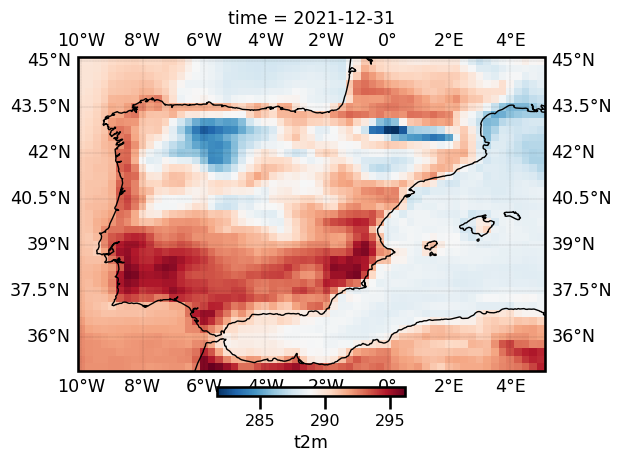

In [37]:
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

cbar_kwargs = {
    "fraction": 0.027, 
    "pad": 0.045, 
    "orientation": "horizontal",
}
ds.t2m.isel(time=-1).plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(),
    cbar_kwargs=cbar_kwargs, cmap="RdBu_r"
)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.1, color='k', alpha=1, 
                  linestyle='--')
ax.coastlines(linewidth=1)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
plt.tight_layout()
plt.show()

## Wind

In [59]:
region = "spain/025" # "europe" #
# u-component wind
u10_files = "/pool/datos/reanalisis/era5/daily/spain/025/u10/*.nc"
# v-component wind
v10_files = "/pool/datos/reanalisis/era5/daily/spain/025/v10/*.nc"
# z, geopotential @ 500
z500_files = "/pool/datos/reanalisis/era5/daily/spain/025/z500/*.nc"
# surface pressure
sp_files = "/pool/datos/reanalisis/era5/daily/spain/025/sp/*.nc"
# solar radiation
ssrd_files = "/pool/datos/reanalisis/era5/daily/spain/025/solar_radiation/*.nc"
# soil moisture
sm_files = "/pool/datos/reanalisis/era5/daily/europe/175/soil_moisture/*.nc"
# sea surface temperature
sst_files = "/pool/datos/reanalisis/era5/daily/mediterranean/025/sst/*.nc"

## Geopotential

In [60]:
ds = xr.open_mfdataset(sst_files)
ds

<xarray.Dataset>
Dimensions:    (longitude: 201, latitude: 73, time: 30316)
Coordinates:
  * longitude  (longitude) float32 -10.0 -9.75 -9.5 -9.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 47.0 46.75 46.5 46.25 ... 29.5 29.25 29.0
  * time       (time) datetime64[ns] 1940-01-01 1940-01-02 ... 2022-12-31
Data variables:
    sst        (time, latitude, longitude) float32 dask.array<chunksize=(366, 73, 201), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2023-03-09 12:11:58 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

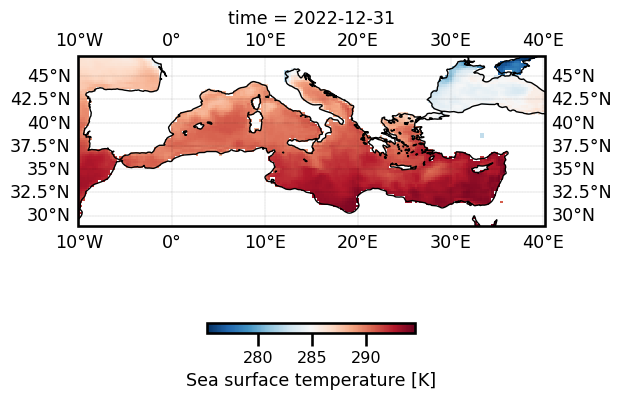

In [61]:
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

cbar_kwargs = {
    "fraction": 0.027, 
    "pad": 0.25, 
    "orientation": "horizontal",
}
ds.sst.isel(time=-1).plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(),
    cbar_kwargs=cbar_kwargs, cmap="RdBu_r"
)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.1, color='k', alpha=1, 
                  linestyle='--')
ax.coastlines(linewidth=1)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
plt.tight_layout()
plt.show()

In [20]:
# select MADRID region
data = ds.sel(longitude=-3.703790, latitude=40.416775, method="nearest")

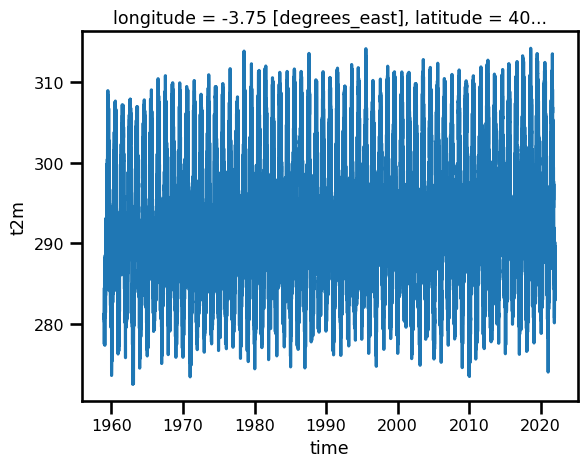

In [24]:
data.t2m.plot()

In [ ]:
countries.mask_3D(ds).where()

In [16]:
ds.t2m.isel(time=0).where(mask).plot.pcolormesh()

ValueError: DataArray must be 2d

## Data

In [141]:
data_url = "/pool/datos/reanalisis/era5/daily/spain/025/t2max/*.nc"
ds = xr.open_mfdataset(data_url)

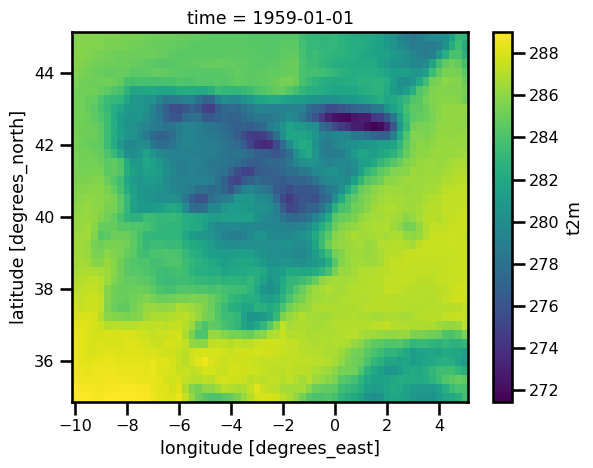

In [142]:
ds.t2m.isel(time=0).plot.pcolormesh()

In [ ]:
LogNormal

## Data

**Climate Data Store**

* ERA5 Land Daily Aggregates - "ECMWF/ERA5_LAND/DAILY_AGGR" - [GEE Link](https://developers.google.com/earth-engine/datasets/catalog/ECMWF_ERA5_LAND_DAILY_AGGR)
* ERA5 Daily Aggregates - "ECMWF/ERA5/DAILY" - [GEE Link](https://developers.google.com/earth-engine/datasets/catalog/ECMWF_ERA5_DAILY)

In [ ]:
pl_variables = ['t', 'u', 'v', 'z', 'r']
pl_levels = [1000, 925, 850, 700, 600, 500, 400, 300, 250, 200, 150, 100, 50]
sl_variables = ['u10m', 'v10m', 't2m', 'sp', 'msl', 'tcwv', 'u100m', 'v100m']

In [15]:
ds = xr.open_dataset(
    'ee://ECMWF/ERA5_LAND/DAILY_AGGR', 
    engine='ee',
    crs='EPSG:4326', 
    scale=0.25
)

In [16]:
ds

<xarray.Dataset>
Dimensions:                                                    (time: 27050,
                                                                lon: 1440,
                                                                lat: 720)
Coordinates:
  * time                                                       (time) datetime64[ns] ...
  * lon                                                        (lon) float32 ...
  * lat                                                        (lat) float32 ...
Data variables: (12/150)
    dewpoint_temperature_2m                                    (time, lon, lat) float64 ...
    temperature_2m                                             (time, lon, lat) float64 ...
    skin_temperature                                           (time, lon, lat) float64 ...
    soil_temperature_level_1                                   (time, lon, lat) float64 ...
    soil_temperature_level_2                                   (time, lon, lat) float64 ...
    soil_temperature_level_3                                   (time, lon, lat) float64 ...
    ...                                                         ...
    total_precipitation_min                                    (time, lon, lat) float64 ...
    total_precipitation_max                                    (time, lon, lat) float64 ...
    leaf_area_index_high_vegetation_min                        (time, lon, lat) float64 ...
    leaf_area_index_high_vegetation_max                        (time, lon, lat) float64 ...
    leaf_area_index_low_vegetation_min                         (time, lon, lat) float64 ...
    leaf_area_index_low_vegetation_max                         (time, lon, lat) float64 ...
Attributes:
    crs:      EPSG:4326

In [17]:
from pathlib import Path
save_dir = Path("/pool/proyectos/CLINT/bayesevt/data/era5/raw")
save_name = Path("era5_land_daily.nc")

In [ ]:
ds.load()

In [18]:
ds.to_netcdf(save_dir.joinpath(save_name))

EEException: Total request size (56623104 bytes) must be less than or equal to 50331648 bytes.

In [ ]:
col

In [3]:
cat = col.search(
    source_id=["MPI-ESM1-2-HR", "MIROC6"],
    variable_id=["pr", "tas"],
    member_id="r1i1p1f1",  #
    table_id="day",
    grid_label="gn",
    experiment_id=["historical", "ssp126", "ssp245", "ssp585"],
    require_all_on=["experiment_id", "variable_id"],
)
kwargs = dict(
    preprocess=combined_preprocessing, xarray_open_kwargs=dict(use_cftime=True)
)
ds_dict = cat.to_dataset_dict(zarr_kwargs={"consolidated": True})

NameError: name 'col' is not defined

In [ ]:
sel_Hamburg = dict(lon=10, lat=53.5)
sel_Madrid = dict(lon=360 - 42, lat=40.5)
sel_Delhi = dict(lon=77, lat=28.5)
sel_Kinshasa = dict(lon=15, lat=-4)
sel_Phoenix = dict(lon=360 - 112, lat=33.5)
sel_Sydney = dict(lon=151, lat=-33.85)

sels = dict(
    Hamburg=sel_Hamburg,
    Madrid=sel_Madrid,
    Delhi=sel_Delhi,
    Kinshasa=sel_Kinshasa,
    Phoenix=sel_Phoenix,
    Sydney=sel_Sydney,
)